In [1]:
#required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
#reading the file
#give path if required

data = pd.read_csv("cubic_zirconia.csv")

In [3]:
data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
print(data.shape)
print(data.columns)

(26967, 10)
Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')


In [4]:
#The describe() method returns description of the data in the DataFrame.

data.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [5]:
#dropping duplicate rows

data.drop_duplicates(inplace=True)
print("Shape of data after dropping duplicate rows: ", data.shape)

Shape of data after dropping duplicate rows:  (26933, 10)


In [6]:
#data type of each column/feature

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
#Checking the number of null vales in data
# Here, depth column has 697 null values

data.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [8]:
#fill the null values using mean
#could also be done with help of median
#inplace=True is to make changes to same dataset

print("Mean: {:.2f} ".format(data['depth'].mean()))

data['depth'].fillna(data['depth'].mean(), inplace=True)#https://pythonguides.com/python-print-2-decimal-places/

Mean: 61.75 


In [9]:
#after calculation 

data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [10]:
#checking for outliers

#as we know we have 7 numerical columns from data.info
#printing that columns

numerical=data.select_dtypes(include='number')
numerical_col=numerical.columns
print(numerical_col)

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')


In [11]:
#get Interquartile range 

for column in numerical_col:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    print('IQR of {} {:.2f}'.format(column,IQR))

IQR of carat 0.65
IQR of depth 1.40
IQR of table 3.00
IQR of x 1.84
IQR of y 1.83
IQR of z 1.14
IQR of price 4411.00


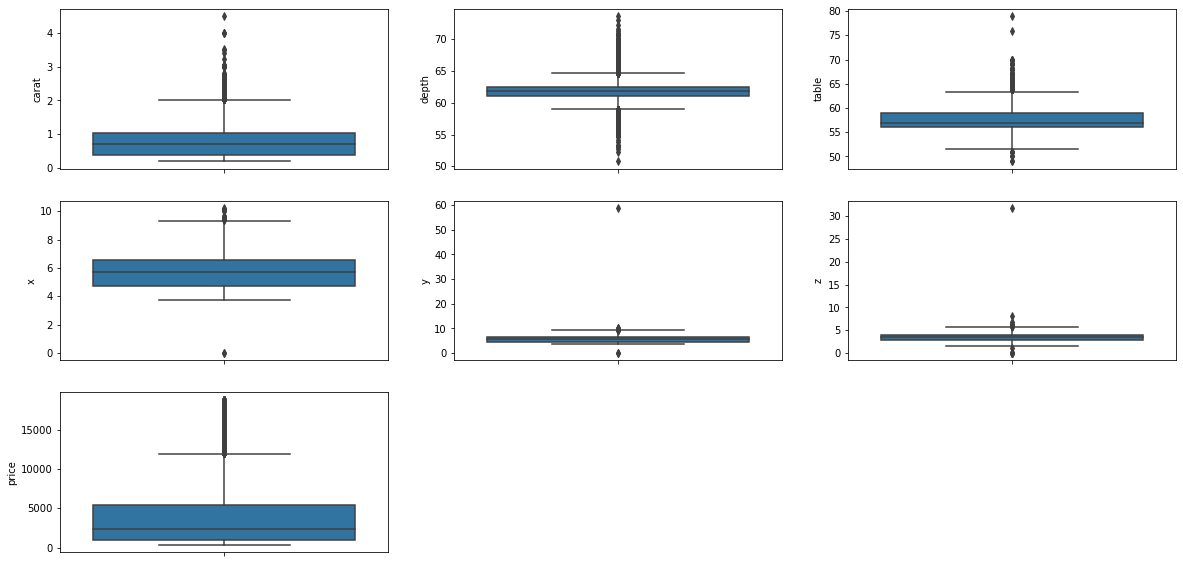

In [12]:
plt.figure(figsize=(20,20))
counter=1
for column in numerical_col:
    plt.subplot(3,3,counter)
    sns.boxplot(y=data[column])
    counter=counter+1
    

In [13]:
#Excluding Outliers 

for column in numerical_col:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
    data=data[(data[column]>lower_bound) & (data[column]<upper_bound)]
        

In [14]:
#shape of data after removing outliers

data.shape

(23271, 10)

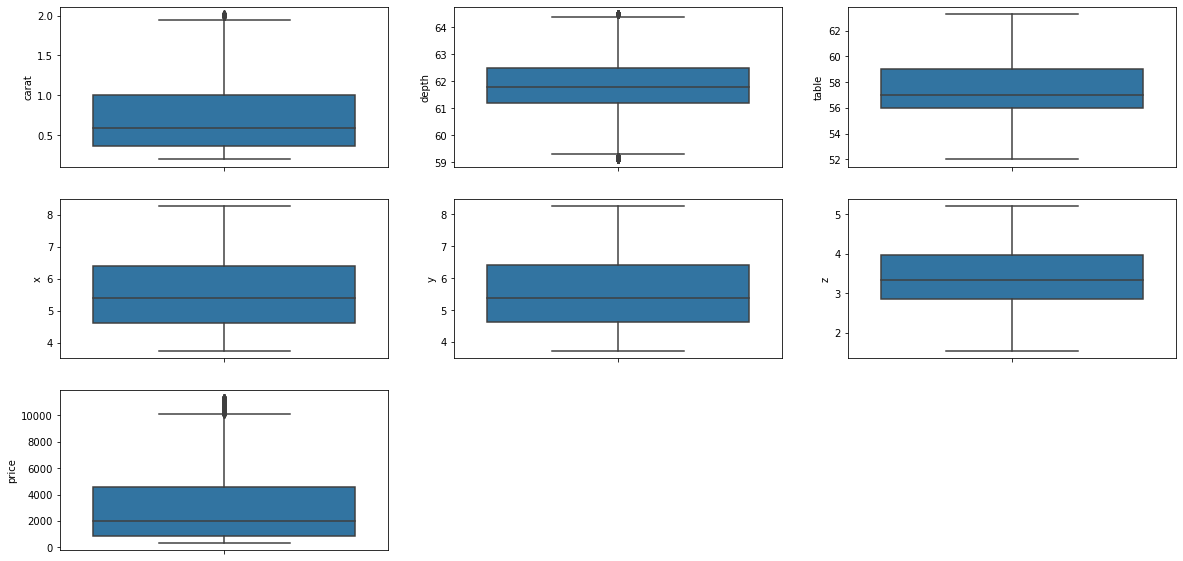

In [15]:
#plotting box-plots without outliers

plt.figure(figsize=(20,10))
counter=1
for column in numerical_col:
    plt.subplot(3,3,counter)
    sns.boxplot(y=data[column])
    counter=counter+1

In [16]:
#categorical data


category=data.select_dtypes(exclude='number')
category_col=category.columns
print(category_col)


Index(['cut', 'color', 'clarity'], dtype='object')


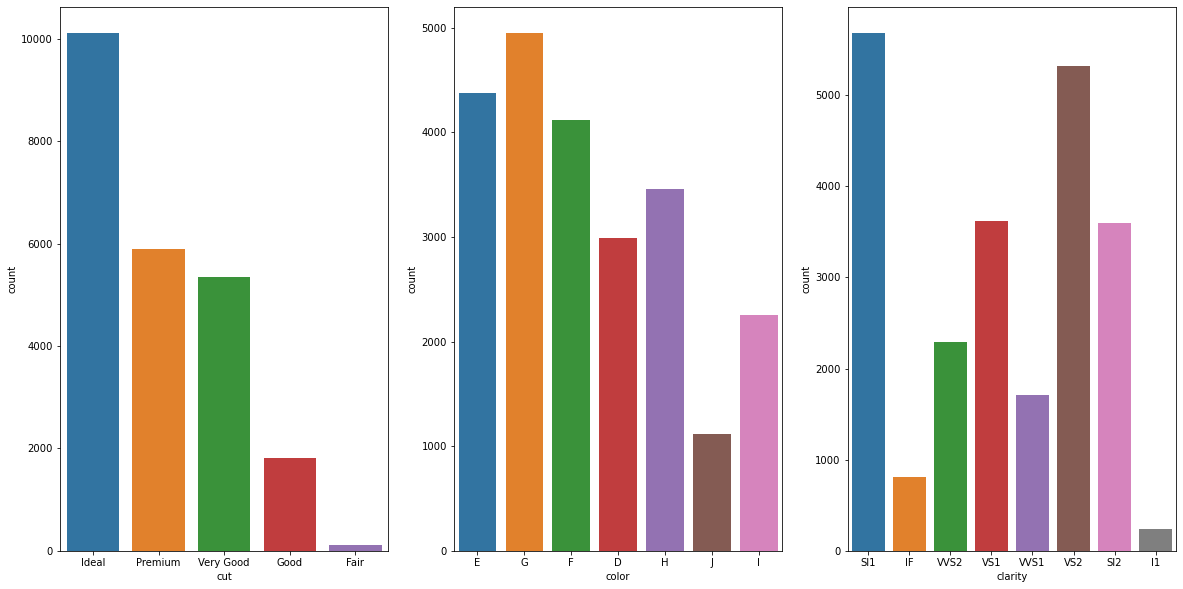

In [17]:
#categorical data univariate 

plt.figure(figsize=(20,10))
counter=1
for column in category_col:
    plt.subplot(1,3,counter)
    sns.countplot(x=data[column])
    counter=counter+1

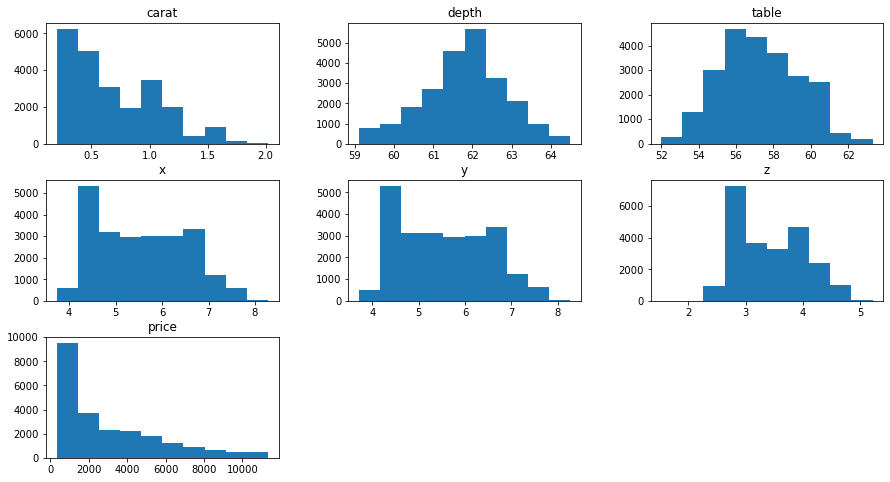

In [18]:
#histograms

data[numerical_col].hist(figsize=(15, 8),grid=False)
plt.show()

Above you can see are right skewed distribution.

In [19]:
#measuring skewness

data[numerical_col].skew()

carat    0.710797
depth   -0.190490
table    0.401213
x        0.270281
y        0.263250
z        0.267562
price    1.172117
dtype: float64

In [27]:
X=data.drop('price',axis=1)

Text(0.5, 1.0, 'Correlation matrix')

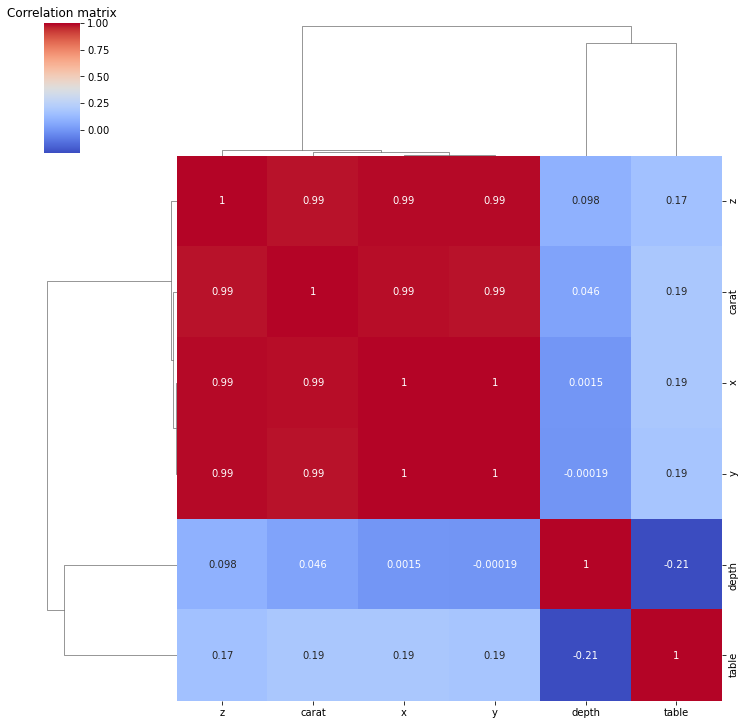

In [21]:
#multivariate analysis
#CORRELATION MATRIX
#Higher the number more the correlated columns are

corr_matrix = X.corr()
sns.clustermap(corr_matrix,cmap='coolwarm',annot=True)
plt.title("Correlation matrix")

In [22]:
#converting text data to numerical data

le=LabelEncoder()
for ft in category_col:
    data[ft]=le.fit_transform(data[ft])

In [23]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779


In [29]:
#standindizing columns

X=data.drop('price',axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

In [30]:
Y=data['price']

In [31]:
#Train Test split(30% randomly selected data points as test data)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=0)

In [32]:
#Linear Regression model

from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

#accuracy
model.score(x_test,y_test)

0.8932237791943829